# Optimal Number of Topics (K)

Before implementing LDA and NMF, it is important to choose an optimal value of K (No. of topics). This is done by employing LDA on a range of topics and calculating the coherence and perplexity scores.

In [3]:
import pandas as pd
import os
os.chdir('D:/Down') #Replace the location to where the output.csv file is stored.
df = pd.read_csv('output.csv')

In [3]:
pip install nltk

In [2]:
#import all necessary libraries
import re

import numpy as np

import pandas as pd

from pprint import pprint

import gensim

import gensim.corpora as corpora

from gensim.utils import simple_preprocess

from nltk.corpus import stopwords

from gensim.models import CoherenceModel

import spacy

import matplotlib.pyplot as plt

import nltk

import spacy

nltk.download('stopwords')

nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Before employing LDA, the captions are preprocessed. This includes tokenisation, stemming, stopword removal, bigram modelling, and lemmatization. This is carried out using NLTK (Natural Language ToolKit)

In [5]:
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text.lower())
    else:
        return []


In [7]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
df["tokens"] = df["Container"].apply(tokenize_text)

In [10]:

#stemming function

import pandas as pd
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

def stem_text(tokens):
    stemmed_tokens = []
    for token in tokens:
        stemmed_tokens.append(stemmer.stem(token))
    return stemmed_tokens

In [31]:

df['tokens'] = df['tokens'].apply(stem_text)

In [12]:

#removing stopwords
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  tok = []
  for token in tokens:
    if token not in stop_words:
      tok.append(token)
  return tok

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:

df['tokens'] = df['tokens'].apply(remove_stopwords)

In [33]:
#bigram modelling
bigram = gensim.models.Phrases(df["tokens"], min_count=5, threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)

In [34]:

def create_bigrams(texts):

    return [bigram_mod[doc] for doc in texts]

In [35]:

data_bigrams = create_bigrams(df["tokens"])

In [36]:
#lemmatizing function
def lemmatize(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):

    texts_op = []

    for sent in texts:

        doc = nlp(" ".join(sent))

        texts_op.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    return texts_op

In [37]:

data_lemmatized = lemmatize(data_bigrams, allowed_postags=[ 'NOUN', 'ADJ', 'VERB'])

In [19]:
import matplotlib.pyplot as plt


To find out the most appropriate value of K, coherence scores are caulcated for different topics and plotting against the topics.

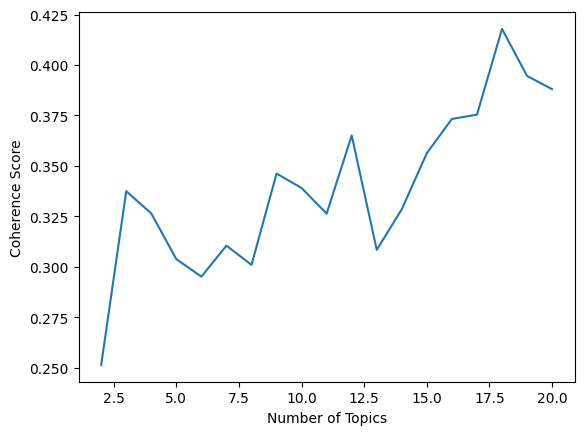

In [20]:



from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

dictionary = Dictionary(data_lemmatized)
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]

min_topics = 2
max_topics = 20
step_size = 1
coherence_scores = []
for num_topics in range(min_topics, max_topics+1, step_size): 
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model_lda = CoherenceModel( #the coherence score is calculated for the range of number of topics
        model=lda_model,
        texts=data_lemmatized,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores.append(coherence_model_lda.get_coherence()) #all coherence scores are stored in a list

plt.plot(range(min_topics, max_topics+1, step_size), coherence_scores) #the coherence scores are plotted against the number of topics
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

Additionally, perplexity scores are also visualised against the Number of Topics.

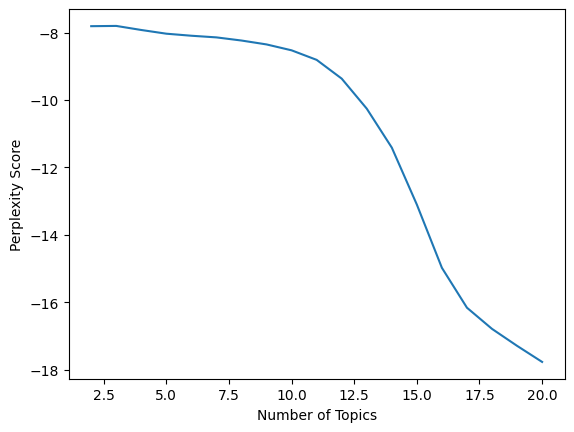

In [21]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#to find out the most appropriate value of K, calculate perplexity scores for different topics

min_topics = 2
max_topics = 20
step_size = 1
perplexity_scores = []
for num_topics in range(min_topics, max_topics+1, step_size):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=50,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=data_lemmatized,
        dictionary=dictionary,
        coherence='c_v'
    )
    perplexity_scores.append(lda_model.log_perplexity(corpus))  #all perplexity scores are stored in a list, log is used because Gensim expresses perplexities on the log scale

plt.plot(range(min_topics, max_topics+1, step_size), perplexity_scores) #perplexity is plotted against the number of topics
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.show()


In [22]:
coherence_scores

[0.25141210109061307,
 0.3374845096198551,
 0.3264328757428314,
 0.3038008466590412,
 0.2951427648581407,
 0.310527953301203,
 0.30096778030820676,
 0.34622648232034425,
 0.3390547572258865,
 0.32637275806916294,
 0.36510418736947403,
 0.30843043342123827,
 0.3285479163276493,
 0.3563459900559907,
 0.37328364045107354,
 0.3753988661114782,
 0.41787535959022376,
 0.3945681365811367,
 0.38802820706186975]

The highest coherence score is found at 18 topics. (0.41)